<a href="https://colab.research.google.com/github/drshahizan/Pandas_Numpy/blob/main/Pandas_date_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with date and time using Pandas
While working with data, encountering time series data is very usual. Pandas is a very useful tool while working with time series data. 

Pandas provide a different set of tools using which we can perform all the necessary tasks on date-time data. Let’s try to understand with the examples discussed below.

Code #1: Create a dates dataframe 

In [ ]:
import pandas as pd

# Create dates dataframe with frequency
data = pd.date_range('1/1/2022', periods = 10, freq ='H')

data

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

**Datetime** features can be divided into two categories. The first one time moments in a period and second the time passed since a particular period. These features can be very useful to understand the patterns in the data.

Divide a given date into features
* pandas.Series.dt.year returns the year of the date time. 
* pandas.Series.dt.month returns the month of the date time. 
* pandas.Series.dt.day returns the day of the date time. 
* pandas.Series.dt.hour returns the hour of the date time. 
* pandas.Series.dt.minute returns the minute of the date time.




Code #2: Break date and time into separate features  

In [ ]:
# Create date and time with dataframe
rng = pd.DataFrame()
rng['date'] = pd.date_range('1/1/2022', periods = 72, freq ='H')

# Print the dates in dd-mm-yy format
rng[:5]

# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute

# Print the dates divided into features
rng.head(3)



,date,year,month,day,hour,minute
0,2022-01-01 00:00:00,2022,1,1,0,0
1,2022-01-01 01:00:00,2022,1,1,1,0
2,2022-01-01 02:00:00,2022,1,1,2,0


Code #3: Let’s analyze this problem on a real dataset uforeports. 

In [1]:
import pandas as pd
 
url = 'https://raw.githubusercontent.com/drshahizan/dataset/main/ufo.csv'
 
# read csv file
df = pd.read_csv(url)          
df.head()


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [2]:

# Convert the Time column to datetime format
df['Time'] = pd.to_datetime(df.Time)
 
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [ ]:
# shows the type of each column data
df.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [ ]:

# Get hour detail from time data
df.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [ ]:
# Get ordinal day of the year
df.Time.dt.dayofyear.head()



0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

## Exploring Pandas Timestamp and Period Objects
The pandas library provides a DateTime object with nanosecond precision called Timestamp to work with date and time values. The Timestamp object derives from the NumPy’s datetime64 data type, making it more accurate and significantly faster than Python’s DateTime object. Let’s create some Timestamp objects using the Timestamp constructor. 

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

print(pd.Timestamp(year=2022, month=9, day=4, hour=1, minute=35, second=10))
print(pd.Timestamp('2022-09-04 1:35.18'))
print(pd.Timestamp('Sep 04, 2022 1:35.18'))

2022-09-04 01:35:10
2022-09-04 01:35:10
2022-09-04 01:35:10


If you pass a single integer or float value to the Timestamp constructor, it returns a timestamp equivalent to the number of nanoseconds after the Unix epoch (Jan 1, 1970):

In [ ]:
print(pd.Timestamp(5000))


1970-01-01 00:00:00.000005


The Timestamp object inclues many methods and properties that help us access different aspects of a timestamp

In [ ]:
time_stamp = pd.Timestamp('2022-02-09')
print('{}, {} {}, {}'.format(time_stamp.day_name(), time_stamp.month_name(), time_stamp.day, time_stamp.year))

Wednesday, February 9, 2022


## Creating the Time-Series DataFrame
First, let’s create a DataFrame by reading data from a CSV file containing critical information associated with 50 servers recorded hourly for 34 consecutive days

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/drshahizan/dataset/main/server_util.csv')
display(df.head())

,datetime,server_id,cpu_utilization,free_memory,session_count
0,2019-03-06 00:00:00,100,0.40,0.54,52
1,2019-03-06 01:00:00,100,0.49,0.51,58
2,2019-03-06 02:00:00,100,0.49,0.54,53
3,2019-03-06 03:00:00,100,0.44,0.56,49
4,2019-03-06 04:00:00,100,0.42,0.52,54


Now, let’s get some details on the characteristics of the DataFrame, such as its size and the data type of each column:

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40800 entries, 0 to 40799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         40800 non-null  object 
 1   server_id        40800 non-null  int64  
 2   cpu_utilization  40800 non-null  float64
 3   free_memory      40800 non-null  float64
 4   session_count    40800 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ MB
None


To convert the data type of the datetime column from a string object to a datetime64 object, we can use the pandas to_datetime() method, as follows:

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40800 entries, 0 to 40799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         40800 non-null  datetime64[ns]
 1   server_id        40800 non-null  int64         
 2   cpu_utilization  40800 non-null  float64       
 3   free_memory      40800 non-null  float64       
 4   session_count    40800 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 MB
None


we can let the pandas read_csv() method parse certain columns as DataTime objects, which is more straightforward than using the to_datetime() method. 

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/drshahizan/dataset/main/server_util.csv', parse_dates=['datetime'])
print(df.head())

             datetime  server_id  cpu_utilization  free_memory  session_count
0 2019-03-06 00:00:00        100             0.40         0.54             52
1 2019-03-06 01:00:00        100             0.49         0.51             58
2 2019-03-06 02:00:00        100             0.49         0.54             53
3 2019-03-06 03:00:00        100             0.44         0.56             49
4 2019-03-06 04:00:00        100             0.42         0.52             54


In [12]:
display(df.datetime.min())
display(df.datetime.max())

Timestamp('2019-03-06 00:00:00')

Timestamp('2019-04-08 23:00:00')

We can return the earliest and latest dates in the DataFrame. Apply the max() and min() methods on the datetime column

In [13]:
display(df.datetime.min())
display(df.datetime.max())

Timestamp('2019-03-06 00:00:00')

Timestamp('2019-04-08 23:00:00')

To select the DataFrame rows between two specific dates, we can create a Boolean mask and use the .loc method to filter rows within a certain date range:

In [14]:
mask = (df.datetime >= pd.Timestamp('2019-03-06')) & (df.datetime < pd.Timestamp('2019-03-07'))
display(df.loc[mask])

,datetime,server_id,cpu_utilization,free_memory,session_count
0,2019-03-06 00:00:00,100,0.40,0.54,52
1,2019-03-06 01:00:00,100,0.49,0.51,58
2,2019-03-06 02:00:00,100,0.49,0.54,53
3,2019-03-06 03:00:00,100,0.44,0.56,49
4,2019-03-06 04:00:00,100,0.42,0.52,54
...,...,...,...,...,...
40003,2019-03-06 19:00:00,149,0.74,0.24,81
40004,2019-03-06 20:00:00,149,0.73,0.23,81
40005,2019-03-06 21:00:00,149,0.79,0.29,83
40006,2019-03-06 22:00:00,149,0.73,0.29,82


## Slicing Time Series
To make Timestamp slicing possible, we need to set the datetime column as the index of the DataFrame. To set a column as an index of a DataFrame, use the set_index method:

In [15]:
df.set_index('datetime', inplace=True)
print(df)

                     server_id  cpu_utilization  free_memory  session_count
datetime                                                                   
2019-03-06 00:00:00        100             0.40         0.54             52
2019-03-06 01:00:00        100             0.49         0.51             58
2019-03-06 02:00:00        100             0.49         0.54             53
2019-03-06 03:00:00        100             0.44         0.56             49
2019-03-06 04:00:00        100             0.42         0.52             54
...                        ...              ...          ...            ...
2019-04-08 19:00:00        149             0.73         0.20             81
2019-04-08 20:00:00        149             0.75         0.25             83
2019-04-08 21:00:00        149             0.80         0.26             82
2019-04-08 22:00:00        149             0.75         0.29             82
2019-04-08 23:00:00        149             0.75         0.24             80

[40800 rows

To select all the rows equal to a single index using the .loc method:



In [ ]:
print(df.loc['2019-03-07 02:00:00'].head(5))


                     server_id  cpu_utilization  free_memory  session_count
datetime                                                                   
2019-03-07 02:00:00        100             0.44         0.50             56
2019-03-07 02:00:00        101             0.78         0.21             87
2019-03-07 02:00:00        102             0.75         0.27             80
2019-03-07 02:00:00        103             0.76         0.28             85
2019-03-07 02:00:00        104             0.74         0.24             77


You can select the rows that partially match a specific Timestamp in the index column. Let’s try it:



In [16]:
print(df.loc['2019-03-07'].head(5))


                     server_id  cpu_utilization  free_memory  session_count
datetime                                                                   
2019-03-07 00:00:00        100             0.51         0.52             55
2019-03-07 01:00:00        100             0.46         0.50             49
2019-03-07 02:00:00        100             0.44         0.50             56
2019-03-07 03:00:00        100             0.45         0.52             51
2019-03-07 04:00:00        100             0.42         0.50             53


we can sort the index before slicing rows

In [17]:
display(df.sort_index().loc['03-04-2019':'04-04-2019'])


,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-03-06 00:00:00,100,0.40,0.54,52
2019-03-06 00:00:00,135,0.50,0.55,55
2019-03-06 00:00:00,110,0.54,0.40,61
2019-03-06 00:00:00,136,0.58,0.40,64
2019-03-06 00:00:00,109,0.57,0.41,61
...,...,...,...,...
2019-04-04 23:00:00,143,0.43,0.52,50
2019-04-04 23:00:00,111,0.53,0.52,59
2019-04-04 23:00:00,149,0.75,0.24,85


## The DateTimeIndex Methods
Some pandas DataFrame methods are only applicable on the DateTimeIndex. We’ll look at some of them in this section, but first, let’s make sure our DataFrame has a DateTimeIndex:




In [18]:
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


To return the server monitoring data collected at a specific time, regardless of the date, use the at_time() method:

In [19]:
display(df.at_time('09:00'))


,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-03-06 09:00:00,100,0.48,0.51,51
2019-03-07 09:00:00,100,0.45,0.49,56
2019-03-08 09:00:00,100,0.45,0.53,53
2019-03-09 09:00:00,100,0.45,0.51,53
2019-03-10 09:00:00,100,0.49,0.55,55
...,...,...,...,...
2019-04-04 09:00:00,149,0.75,0.21,80
2019-04-05 09:00:00,149,0.71,0.26,83
2019-04-06 09:00:00,149,0.75,0.30,83


Also, to select all the server data between midnight and 2 AM on all dates, use the between_time() method.

In [20]:
display(df.between_time('00:00','02:00'))


,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-03-06 00:00:00,100,0.40,0.54,52
2019-03-06 01:00:00,100,0.49,0.51,58
2019-03-06 02:00:00,100,0.49,0.54,53
2019-03-07 00:00:00,100,0.51,0.52,55
2019-03-07 01:00:00,100,0.46,0.50,49
...,...,...,...,...
2019-04-07 01:00:00,149,0.74,0.21,78
2019-04-07 02:00:00,149,0.76,0.26,74
2019-04-08 00:00:00,149,0.75,0.28,75


In [21]:
display(df.sort_index().first('5B'))


,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-03-06,100,0.40,0.54,52
2019-03-06,135,0.50,0.55,55
2019-03-06,110,0.54,0.40,61
2019-03-06,136,0.58,0.40,64
2019-03-06,109,0.57,0.41,61
...,...,...,...,...
2019-03-12,134,0.53,0.45,61
2019-03-12,144,0.68,0.31,73
2019-03-12,113,0.76,0.24,83


In [22]:
display(df.sort_index().last('1W'))


,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-04-08 00:00:00,106,0.44,0.62,49
2019-04-08 00:00:00,112,0.72,0.29,81
2019-04-08 00:00:00,100,0.43,0.54,51
2019-04-08 00:00:00,137,0.75,0.28,83
2019-04-08 00:00:00,110,0.61,0.40,62
...,...,...,...,...
2019-04-08 23:00:00,128,0.64,0.41,64
2019-04-08 23:00:00,127,0.67,0.33,78
2019-04-08 23:00:00,126,0.71,0.33,73


In [23]:
df.sort_index().last('2W')


,server_id,cpu_utilization,free_memory,session_count
datetime,,,,
2019-04-01 00:00:00,120,0.54,0.48,63
2019-04-01 00:00:00,104,0.73,0.31,83
2019-04-01 00:00:00,103,0.77,0.22,82
2019-04-01 00:00:00,124,0.39,0.55,49
2019-04-01 00:00:00,127,0.68,0.37,73
...,...,...,...,...
2019-04-08 23:00:00,128,0.64,0.41,64
2019-04-08 23:00:00,127,0.67,0.33,78
2019-04-08 23:00:00,126,0.71,0.33,73


## Resampling Time Series Data
The logic behind the resample() method is similar to the groupby() method. It groups data within any possible period. Although we can use the resample() method for both upsampling and downsampling, we’ll focus on how to use it to perform downsampling, which reduces the frequency of time-series data — for instance, converting hourly time-series data to daily or daily time-series data to monthly.

The following example returns the average CPU utilization, free memory, and active session count of server ID 100 each day. To do that, we need first to filter the DataFrame’s rows with server ID 100, then we resample the hourly data to daily data. Finally, apply the mean() method on the result to get the daily average of the three metrics:

In [24]:
df[df.server_id == 100].resample('D')['cpu_utilization', 'free_memory', 'session_count'].mean()


,cpu_utilization,free_memory,session_count
datetime,,,
2019-03-06,0.470417,0.535417,53.000000
2019-03-07,0.455417,0.525417,53.666667
2019-03-08,0.478333,0.532917,54.541667
2019-03-09,0.472917,0.523333,54.166667
2019-03-10,0.465000,0.527500,54.041667
2019-03-11,0.469583,0.528750,53.916667
2019-03-12,0.475000,0.533333,53.750000
2019-03-13,0.462917,0.521667,52.541667
2019-03-14,0.472083,0.532500,54.875000


The following statement returns the maximum CPU utilization and free memory each month for each server. 

In [25]:
df.groupby(df.server_id).resample('M')['cpu_utilization', 'free_memory'].max()


cpu_utilization  free_memory
server_id datetime                                
100       2019-03-31             0.56         0.62
          2019-04-30             0.55         0.61
101       2019-03-31             0.91         0.32
          2019-04-30             0.89         0.30
102       2019-03-31             0.85         0.36
...                               ...          ...
147       2019-04-30             0.61         0.57
148       2019-03-31             0.84         0.35
          2019-04-30             0.83         0.34
149       2019-03-31             0.85         0.36
          2019-04-30             0.83         0.34

[100 rows x 2 columns]

let’s plot the average CPU utilization of each server on a monthly basis

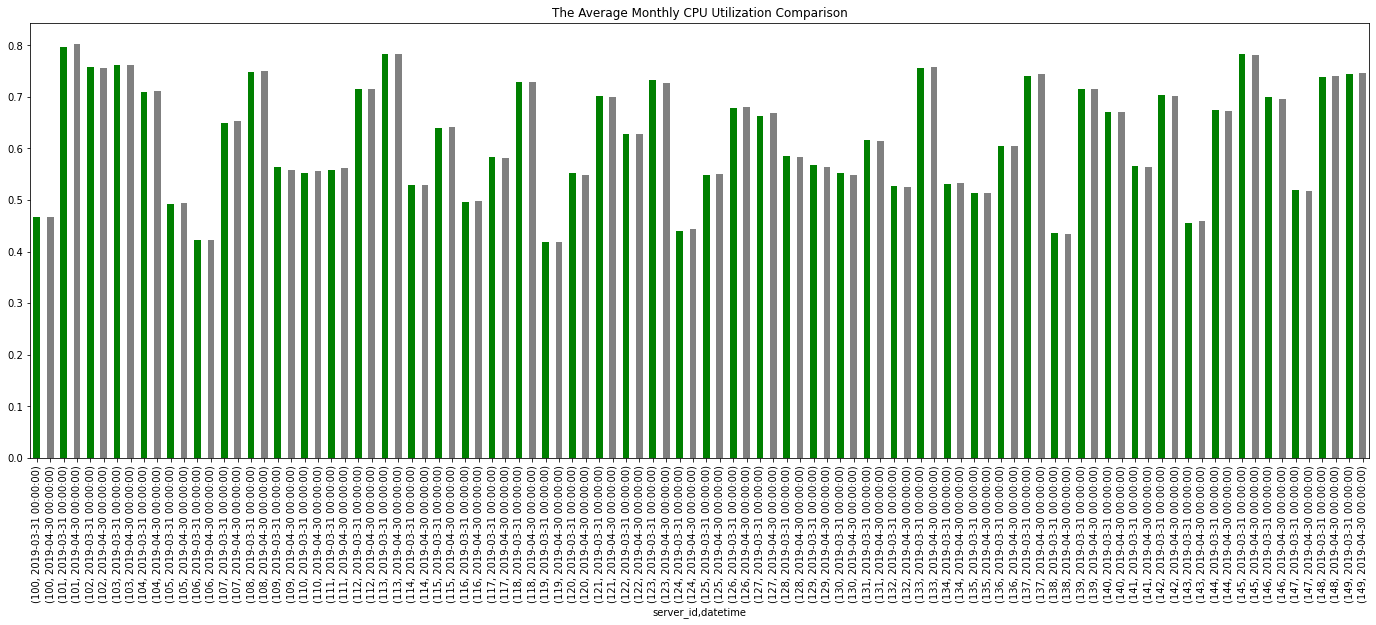

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 8))
df.groupby(df.server_id).resample('M')['cpu_utilization'].mean()\
.plot.bar(color=['green', 'gray'], ax=ax, title='The Average Monthly CPU Utilization Comparison')
